In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]= (10,3) #make figures larger

we can load the data directly from github instead of downloading locally. 

In [3]:
base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/" # loading the data directly from the internet
infected_dataset_url = base_url + "time_series_covid19_confirmed_global.csv"
recovered_dataset_url = base_url + "time_series_covid19_recovered_global.csv"
deaths_dataset_url = base_url + "time_series_covid19_deaths_global.csv"
countries_dataset_url = base_url + "../UID_ISO_FIPS_LookUp_Table.csv"


we can now load data for infected individuals and see how the data looks.

In [7]:
infected = pd.read_csv(infected_dataset_url)
infected.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [13]:
recovered = pd.read_csv(recovered_dataset_url)

recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
deaths = pd.read_csv(deaths_dataset_url)

deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


Making Sense of the Data 

We can see the Province/State column but we arent sure what it is yet so we can go ahead and look at it.

In [9]:
infected['Province/State'].value_counts()

Province/State
Australian Capital Territory    1
Saint Pierre and Miquelon       1
Reunion                         1
New Caledonia                   1
Mayotte                         1
                               ..
Gansu                           1
Fujian                          1
Chongqing                       1
Beijing                         1
Turks and Caicos Islands        1
Name: count, Length: 91, dtype: int64

China and Autralia have more breakdown by provinces so we will look at China.

In [10]:
infected[infected['Country/Region']== 'China']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
59,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,2275,2275,2275,2275,2275,2275,2275,2275,2275,2275
60,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,40774,40774,40774,40774,40774,40774,40774,40774,40774,40774
61,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,14715,14715,14715,14715,14715,14715,14715,14715,14715,14715
62,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,...,17122,17122,17122,17122,17122,17122,17122,17122,17122,17122
63,Gansu,China,35.7518,104.2861,0,2,2,4,7,14,...,1742,1742,1742,1742,1742,1742,1742,1742,1742,1742
64,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,...,103248,103248,103248,103248,103248,103248,103248,103248,103248,103248
65,Guangxi,China,23.8298,108.7881,2,5,23,23,36,46,...,13371,13371,13371,13371,13371,13371,13371,13371,13371,13371
66,Guizhou,China,26.8154,106.8748,1,3,3,4,5,7,...,2534,2534,2534,2534,2534,2534,2534,2534,2534,2534
67,Hainan,China,19.1959,109.7453,4,5,8,19,22,33,...,10483,10483,10483,10483,10483,10483,10483,10483,10483,10483
68,Hebei,China,39.5490,116.1306,1,1,2,8,13,18,...,3292,3292,3292,3292,3292,3292,3292,3292,3292,3292


Pre Processing the Data

since we are intrested in breaking down the regions further we can group using the location.we add all information on all territories together , to get infor on the whole country.

In [15]:
infected = infected.groupby('Country/Region').sum()
recovered = recovered.groupby('Country/Region').sum()
deaths = deaths.groupby('Country/Region').sum()

infected.head()

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,33.93911,67.709953,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,0,41.15330,20.168300,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,0,28.03390,1.659600,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
Andorra,0,42.50630,1.521800,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
Angola,0,-11.20270,17.873900,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


Using groupby all DataFrames are now indexed by country/region. We can thus access specific data for a country using .iloc.

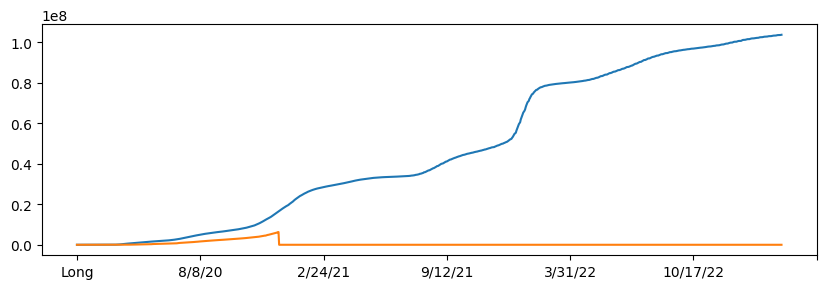

In [16]:
infected.loc['US'][2:].plot()
recovered.loc['US'][2:].plot() 
plt.show()

we use 2 to remove the first two elements that contain geolocation(latitudes and Longitudes) so we can also drop these two colums all together.

In [18]:
infected.drop(columns=['Lat','Long'],inplace=True)
recovered.drop(columns=['Lat','Long'],inplace=True)
deaths.drop(columns=['Lat','Long'],inplace=True)
                        


Investigating the Data.

We we create a frame that contains Data on infections indexed by date.

In [21]:
def mkframe(country):
    df = pd.DataFrame({
        'infected': infected.loc[country],
        'recovered': recovered.loc[country],
        'deaths': deaths.loc[country]
    })
    df.index = pd.to_datetime(df.index, errors = 'coerce')
    #drop any columns where datetime conversion failed
    df = df.dropna()
    
    return df

df = mkframe('US')
df

C:\Users\toshiba\AppData\Local\Temp\ipykernel_13144\2153820670.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df.index, errors = 'coerce')


,infected,recovered,deaths
NaT,0,0,0
2020-01-22,1,0,0
2020-01-23,1,0,0
2020-01-24,2,0,0
2020-01-25,2,0,0
...,...,...,...
2023-03-05,103646975,0,1122134
2023-03-06,103655539,0,1122181
2023-03-07,103690910,0,1122516
2023-03-08,103755771,0,1123246


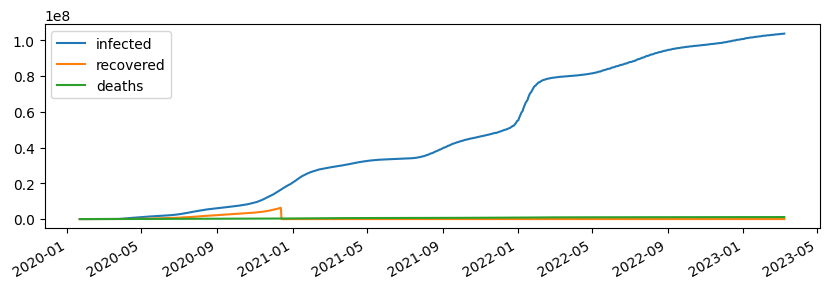

In [22]:
df.plot()
plt.show()

Now we can compute the progression of the disease and we can do this by looking at new infection per day. We can do this using .diff

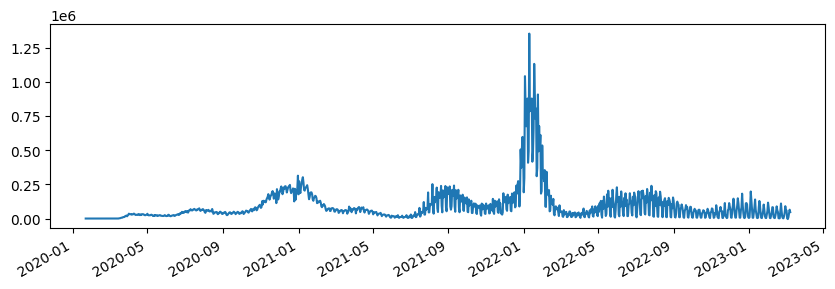

In [23]:
df['ninfected']= df['infected'].diff()
df['ninfected'].plot()
plt.show()

we can see fluctuation in the data we can now look at a specific month.

<Axes: >

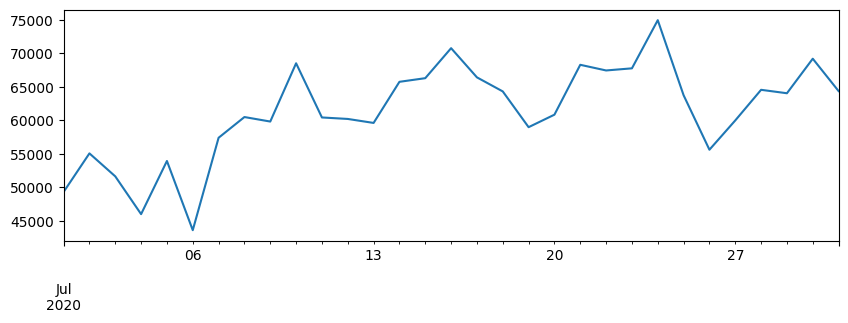

In [24]:
df[(df.index.year == 2020) & (df.index.month == 7)]['ninfected'].plot()

It clearly looks like there are weekly fluctuations in data. Because we want to be able to see the trends, it makes sense to smooth out the curve by computing running average (i.e. for each day we will compute the average value of the previous several days):

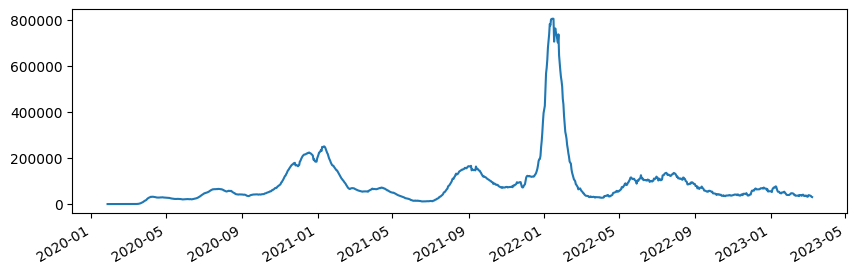

In [25]:
df['infav'] = df['ninfected'].rolling(7).mean()
df['infav'].plot()
plt.show()

In order to be able to compare several countries, take the country's population into account, and compare the percentage of infected individuals with respect to country's population. In order to get country's population, load the dataset of countries:

In [26]:
countries = pd.read_csv(countries_dataset_url)
countries.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
0,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.93911,67.709953,Afghanistan,38928341.0
1,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.15330,20.168300,Albania,2877800.0
2,10,AQ,ATA,10.0,NaN,NaN,NaN,Antarctica,-71.94990,23.347000,Antarctica,NaN
3,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.03390,1.659600,Algeria,43851043.0
4,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.50630,1.521800,Andorra,77265.0


Because this dataset contains information on both countries and provinces, to get the population of the whole country we need to do the following.

In [28]:
countries[(countries['Country_Region']== 'US') & countries['Province_State'].notnull()]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
916,16,AS,ASM,16.0,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",55641.0
917,316,GU,GUM,316.0,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",164229.0
918,580,MP,MNP,580.0,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",55144.0
919,850,VI,VIR,850.0,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,"Virgin Islands, US",107268.0
920,630,PR,PRI,630.0,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,"Puerto Rico, US",3193694.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4316,84056037,US,USA,840.0,56037.0,Sweetwater,Wyoming,US,41.659439,-108.882788,"Sweetwater, Wyoming, US",42343.0
4317,84056039,US,USA,840.0,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",23464.0
4318,84056041,US,USA,840.0,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",20226.0
4319,84056043,US,USA,840.0,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,"Washakie, Wyoming, US",7805.0


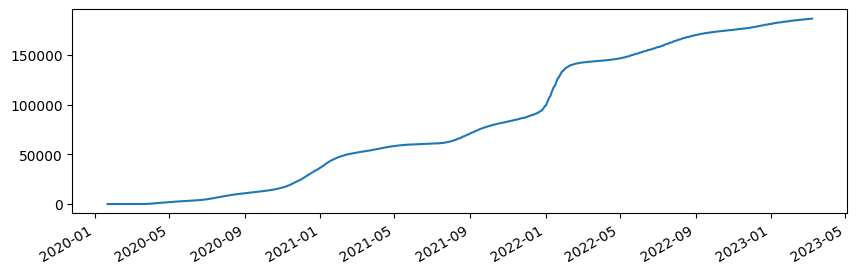

In [30]:
pop = countries[(countries['Country_Region']== 'US') & countries['Province_State'].notnull()]['Population'].iloc[0]
df['pinfected'] = df['infected'] * 100/pop
df['pinfected'].plot()
plt.show()

o see how infectious is the disease, we look at the **basic reproduction number** $R_0$, which indicated the number of people that an infected person would further infect. When $R_0$ is more than 1, the epidemic is likely to spread.\n",
    "\n",
    "$R_0$ is a property of the disease itself, and does not take into account some protective measures that people may take to slow down the pandemic. During the pandemic progression, we can estimate the reproduction number $R_t$ at any given time $t$. It has been shown that this number can be roughly estimated by taking a window of 8 days, and computing $$R_t=\\frac{I_{t-7}+I_{t-6}+I_{t-5}+I_{t-4}}{I_{t-3}+I_{t-2}+I_{t-1}+I_t}$$\n",
    "where $I_t$ is the number of newly infected individuals on day $t$.\n",
    "\n",
    "Let's compute $R_t$ for our pandemic data. To do this, we will take a rolling window of 8 `ninfected` values, and apply the function to compute the ratio above

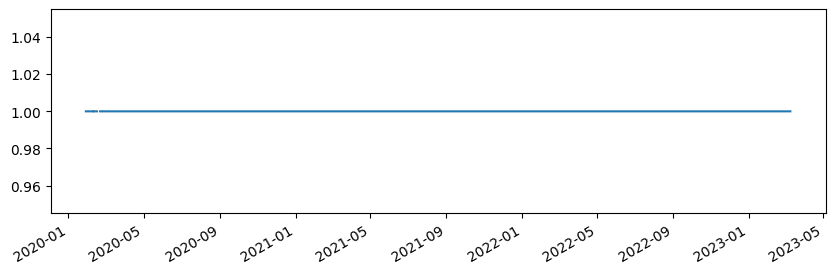

In [32]:
df['RT'] = df['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[4:].sum())
df['RT'].plot()
plt.show()

We can see that there are some gaps in the graph. Those can be caused by either NaN, if inf values being present in the dataset(countries). inf may be caused by division by 0, and NaN can indicate missing data, or no data available to compute the result (like in the very beginning of our frame, where rolling window of width 8 is not yet available). To make the graph nicer, we need to fill those values using replace and fillna function.

 Further look at the beginning of the pandemic. We will also limit the y-axis values to show only values below 6, in order to see better, and draw horizontal line at 1.

C:\Users\toshiba\AppData\Local\Temp\ipykernel_13144\796883829.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ax = df [df.index<"2020-05-01"]['RT'].replace(np.inf, np.nan).fillna(method='pad').plot(figsize=(10,3))


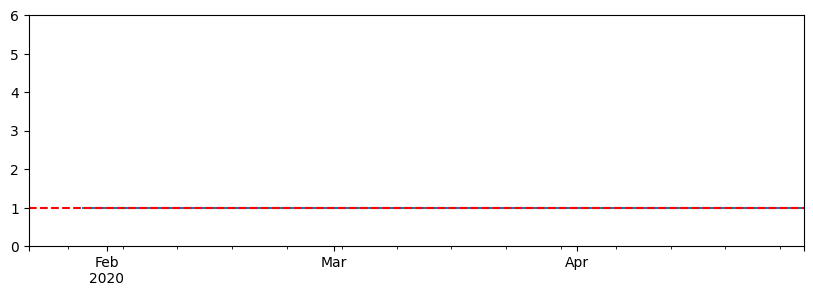

In [33]:
ax = df [df.index<"2020-05-01"]['RT'].replace(np.inf, np.nan).fillna(method='pad').plot(figsize=(10,3))
ax.set_ylim([0, 6])
ax.axhline(1, color='red', linestyle='--')
plt.show()